In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
# nltk.download()
from sklearn.model_selection import GridSearchCV
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
import pickle
from matplotlib import pyplot as plt

In [ ]:
# data=pd.read_csv("train.txt",delimiter=";",names=["text","label"])
# test_da=pd.read_csv("test.txt",delimiter=";",names=["text","label"])

In [5]:
df_train = pd.read_csv("train.txt",delimiter=';',names=['text','label'])
df_val = pd.read_csv("val.txt",delimiter=';',names=['text','label'])
df = pd.concat([df_train,df_val])

df.reset_index(drop=True,inplace=True)
df['label'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [ ]:
df_train

In [6]:
def enco(df):
    df.replace(to_replace="surprise",value=1,inplace=True)
    df.replace(to_replace="joy",value=2,inplace=True)
    df.replace(to_replace="love",value=3,inplace=True)
    df.replace(to_replace="sadness",value=4,inplace=True)
    df.replace(to_replace="anger",value=5,inplace=True)
    df.replace(to_replace="fear",value=6,inplace=True)
    
enco(df.label)
enco(df_train)
df.to_csv("enco_file.csv")
df_train.to_csv("enco_train_file.csv")

In [7]:
fina=[]
def conver(data):
    for val in range(len(data)):
        lm = WordNetLemmatizer()
        stopword=set(stopwords.words("english"))
        wor=re.sub("[^A-Za-z]",' ',str(data[val]))
        wor=wor.lower() 
        wor=wor.split()
        wor = [lm.lemmatize(word) for word in wor if word not in set(stopwords.words('english'))]    
        tex=[]
        for ijx in wor:
            if ijx not in stopword:
                tex.append(lm.lemmatize(ijx))
        fina.append(" ".join(tex))
    print(fina)
    print(len(fina))    
    
train_fina=[]
def train_conver(data):
    for val in range(len(data)):
        lm = WordNetLemmatizer()
        stopword=set(stopwords.words("english"))
        wor=re.sub("[^A-Za-z]",' ',str(data[val]))
        wor=wor.lower() 
        wor=wor.split()
        wor = [lm.lemmatize(word) for word in wor if word not in set(stopwords.words('english'))]    
        tex=[]
        for ijx in wor:
            if ijx not in stopword:
                tex.append(lm.lemmatize(ijx))
        train_fina.append(" ".join(tex))
    print(train_fina)
    print(len(train_fina))
    

    

In [6]:
# conver(df.text)
# train_conver(df_train.text)

# fina_data=pd.DataFrame(fina,columns=["process"])
# fina_data.to_csv("processed.csv")

# train_da=pd.DataFrame(train_fina,columns=["process"])
# train_da.to_csv("train_process.csv")

In [6]:
# train_da=pd.DataFrame(train_fina,columns=["process"])
# train_da.to_csv("train_process.csv")

In [8]:
process_data=pd.read_csv("processed.csv")
process_data["process"]
train_process=pd.read_csv("train_process.csv")
# train_process=pd.read_csv("custom_dattt.csv")
train_process["process"]


0                                    didnt feel humiliated
1        go feeling hopeless damned hopeful around some...
2                im grabbing minute post feel greedy wrong
3        ever feeling nostalgic fireplace know still pr...
4                                          feeling grouchy
                               ...                        
15995        brief time beanbag said anna feel like beaten
15996    turning feel pathetic still waiting table subb...
15997                             feel strong good overall
15998                       feel like rude comment im glad
15999                         know lot feel stupid portray
Name: process, Length: 16000, dtype: object

In [12]:
# process_data["process"].to_csv("op.csv")

In [10]:
vector=CountVectorizer()
x=vector.fit_transform(process_data["process"])
test=vector.transform(train_process["process"])
x.shape
# test.toarray()

(18000, 14271)

In [15]:
# pd.DataFrame(x).to_csv("op.csv")

In [9]:
# pd.DataFrame(fina).to_csv("processed.csv")
fina

[]

In [17]:
model=RandomForestClassifier()
model.fit(x,df.label)


RandomForestClassifier()

In [8]:
RandomForestClassifier?

In [21]:

# predic_random=model.predict(test)
# acc_random=accuracy_score(df_train.label,predic_random)
# acc_random

In [14]:
GridSearchCV?


In [21]:
param={'n_estimators':[100,200,300],
      'criterion':['gini','entropy'],
#       'max_depth':[10,20,30,40,50,60,70,80,90,100],
#        'max_features':['auto','log2','sqrt'],
#        'min_sample_leaf':[3,5,7,9,11],
#        'min_samples_split': [2,5,10]
      }
# ,13,15,17,19,21,23,25 min sample

In [15]:
# grid.get_params().keys()

In [16]:
# moaa=RandomForestClassifier() 
# grid=GridSearchCV(moaa,param,cv=5,n_jobs=-1)



In [31]:
moaa=RandomForestClassifier() 
# grid=GridSearchCV(moaa,param,verbose=5,cv=10)



In [27]:
# grid.get_params
# from sklearn import preprocessing
# X = preprocessing.scale(grid) 

In [31]:
# grid.fit(x,df.label)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] criterion=gini, n_estimators=100 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... criterion=gini, n_estimators=100, score=0.889, total=  56.8s
[CV] criterion=gini, n_estimators=100 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   56.7s remaining:    0.0s


[CV] .... criterion=gini, n_estimators=100, score=0.897, total=  53.6s
[CV] criterion=gini, n_estimators=100 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.8min remaining:    0.0s


[CV] .... criterion=gini, n_estimators=100, score=0.895, total=  49.7s
[CV] criterion=gini, n_estimators=100 ................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min remaining:    0.0s


[CV] .... criterion=gini, n_estimators=100, score=0.894, total=  49.5s
[CV] criterion=gini, n_estimators=100 ................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.5min remaining:    0.0s


[CV] .... criterion=gini, n_estimators=100, score=0.864, total=  48.9s
[CV] criterion=gini, n_estimators=100 ................................
[CV] .... criterion=gini, n_estimators=100, score=0.876, total=  52.2s
[CV] criterion=gini, n_estimators=100 ................................
[CV] .... criterion=gini, n_estimators=100, score=0.891, total=  52.1s
[CV] criterion=gini, n_estimators=100 ................................
[CV] .... criterion=gini, n_estimators=100, score=0.894, total=  50.5s
[CV] criterion=gini, n_estimators=100 ................................
[CV] .... criterion=gini, n_estimators=100, score=0.899, total=  50.1s
[CV] criterion=gini, n_estimators=100 ................................
[CV] .... criterion=gini, n_estimators=100, score=0.893, total=  50.2s
[CV] criterion=gini, n_estimators=200 ................................
[CV] .... criterion=gini, n_estimators=200, score=0.886, total= 1.6min
[CV] criterion=gini, n_estimators=200 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 111.8min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 200, 300]},
             verbose=5)

In [10]:
# pickle.dump(model, open("grid_model_with_2_hp.pkl", "wb"))
# 
gridd = pickle.load(open("grid_model_with_2_hp.pkl", "rb"))



In [34]:
gridd.

<bound method BaseForest.apply of RandomForestClassifier()>

In [26]:
print("best param :",grid.best_params_)
print("best accuraccy",grid.best_score_)
# 
aa=pd.DataFrame(grid.cv_results_).sort_values(by=['rank_test_score'])
aa[['mean_test_score','std_test_score','rank_test_score']]

# # means_test = results['mean_test_score']
# # stds_test = results['std_test_score']
# # means_train = results['mean_train_score']
# # stds_train = results['std_train_score']
# print("means_test :",aa['mean_test_score'])
# print("stds_test",aa['std_test_score'])
# print("means_train :",aa['mean_train_score'])
# print("stds_train",aa['std_train_score'])
# for i in aa:
#     print(i)

AttributeError: 'RandomForestClassifier' object has no attribute 'best_params_'

In [87]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [88]:
# def plot_search_results(grid):
#     """
#     Params: 
#         grid: A trained GridSearchCV object.
#     """
#     ## Results from grid search
#     results = grid.cv_results_
#     means_test = results['mean_test_score']
#     stds_test = results['std_test_score']
# #     means_train = results['mean_train_score']
# #     stds_train = results['std_train_score']

#     ## Getting indexes of values per hyper-parameter
#     masks=[]
#     masks_names= list(grid.best_params_.keys())
#     for p_k, p_v in grid.best_params_.items():
#         masks.append(list(results['param_'+p_k].data==p_v))

#     params=grid.param_grid

#     ## Ploting results
#     fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
#     fig.suptitle('Score per parameter')
#     fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
#     pram_preformace_in_best = {}
#     for i, p in enumerate(masks_names):
#         m = np.stack(masks[:i] + masks[i+1:])
#         pram_preformace_in_best
#         best_parms_mask = m.all(axis=0)
#         best_index = np.where(best_parms_mask)[0]
#         x = np.array(params[p])
#         y_1 = np.array(means_test[best_index])
#         e_1 = np.array(stds_test[best_index])
# #         y_2 = np.array(means_train[best_index])
# #         e_2 = np.array(stds_train[best_index])
#         ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
# #         ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
#         ax[i].set_xlabel(p.upper())

#     plt.legend()
#     plt.show()

In [ ]:
param={'n_estimators':[100,200,300],
      'criterion':['gini','entropy'],
#       'max_depth':[10,20,30,40,50,60,70,80,90,100],
#        'max_features':['auto','log2','sqrt'],
#        'min_sample_leaf':[3,5,7,9,11],
#        'min_samples_split': [2,5,10]
      }
# ,13,15,17,19,21,23,25 min sample

In [93]:
# def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
#     # Get Test Scores Mean and std for each grid search
#     scores_mean = cv_results['mean_test_score']
#     scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

#     scores_sd = cv_results['std_test_score']
#     scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

#     # Plot Grid search scores
#     _, ax = plt.subplots(1,1)

#     # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
#     for idx, val in enumerate(grid_param_2):
#         ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

#     ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
#     ax.set_xlabel(name_param_1, fontsize=16)
#     ax.set_ylabel('CV Average Score', fontsize=16)
#     ax.legend(loc="best", fontsize=15)
#     ax.grid('on')

# # Calling Method 
# plot_grid_search(grid.cv_results_, [100,200,300], "max_features", 'N Estimators', 'Max Features')

ValueError: cannot reshape array of size 6 into shape (12,3)

In [14]:
cust_test_process=pd.read_csv("custom_dattt.csv")
len(cust_test_process["process"])


# cust_test=vector.transform(cust_test_process["process"])

180

In [63]:
# xtrain,xtest,ytrain,ytest=train_test_split(cust_test_process,df_train.label,test_size=0.1,shuffle=True,random_state=32)
# test.shape()

TypeError: 'tuple' object is not callable

In [19]:
# xtrain,xtest,ytrain,ytest=train_test_split(test,df_train.label,shuffle=True,random_state=32)
predic_grid_random=model.predict(test)
acc_grid_random=accuracy_score(df_train.label,predic_grid_random)
acc_grid_random

0.9976875

In [13]:

inp=input("Enter a Sentence: ")

train_fina=[]
lm = WordNetLemmatizer()
stopword=set(stopwords.words("english"))
wor=re.sub("[^A-Za-z]",' ',str(inp))
wor=wor.lower()    
wor=wor.split()
wor = [lm.lemmatize(word) for word in wor if word not in set(stopwords.words('english'))]
tex=[]
for ijx in wor:
    if ijx not in stopword:
        tex.append(lm.lemmatize(ijx))
train_fina.append(" ".join(tex))

test=vector.transform(train_fina)
predic=mod.predict(test)
# print(predict)
if(predic[0] == 1):
    print("Surprice") 
if(predic[0] == 2):
    print("Joy")
if(predic[0] == 3):
    print("Love")
if(predic[0] == 4):
    print("Sadness")
if(predic[0] == 5):
    print("Anger")
if(predic[0] == 6):
    print("Fear")
    

Enter a Sentence: some
Joy


In [ ]:
positive=[]
negative=[]
neutral=[]
def custom(inputt):

#     inp=input("Enter a Sentence: ")
#     print(inputt," :: ")
    train_fina=[]
    lm = WordNetLemmatizer()
    stopword=set(stopwords.words("english"))
    wor=re.sub("[^A-Za-z]",' ',str(inputt))
    wor=wor.lower()    
    wor=wor.split()
    wor = [lm.lemmatize(word) for word in wor if word not in set(stopwords.words('english'))]
    tex=[]
    for ijx in wor:
        if ijx not in stopword:
            tex.append(lm.lemmatize(ijx))
    train_fina.append(" ".join(tex))

    test=vector.transform(train_fina)
    predic=gridd.predict(test)
    # print(predict)
    if(predic[0] == 1):
#         positive
        print("Positive") 
    if(predic[0] == 2):
        print("Neutral")
    if(predic[0] == 3):
        print("Positive")
    if(predic[0] == 4):
        print("Negative")
    if(predic[0] == 5):
        print("Negative")
    if(predic[0] == 6):
        print("Negative")


In [50]:
cust=pd.read_csv("custom_data.csv")
cust.keys()
rat_year=cust['Reviewed Year']
rat_helpfull=cust['Helpfull No']
cust
review=cust['Review']
review
# gridd.base_estimator

DecisionTreeClassifier()

In [149]:
train_conver(review)

['worst phone seen spec amd buyed satisfied samsung mobile amoled screen always display mentioned redmi note display clarity worst lcd always display stay sec worst camera performnace wise ok didnt liked phone dont trap technical gimmiks', 'good', 'well photo quality bad note series better note camera need work capture detail photo like previous model redmi mp camera redmi note good mp camera redmi note', 'phone tooo good battery life day paisa toh maine girlfriend se udhar liye hai wo toh bol rahe hai ki lautane ki jarurat nai hai par u pagli ko ye nai pata ki main sach mein dene wala nai hu phone toh mere biwi se bhi halka hai baaki camera thoda aur acha hona chaiye tha wo kya hai na mera ek kaala dost hai uske photo ke liye sarre filter laga ke dekhe par wo bechara abhi bhi kaala aata hai baaki sab mast hai', 'buy first ever redmi product disappointing screen light someone call check attached picture fingerprint scanner take age many attempt respond front camera one worst seen recen

In [150]:
cust_revi=pd.DataFrame(train_fina)

In [165]:
custon_reiw_data=pd.DataFrame(train_fina,columns=["process"])
custon_reiw_data.to_csv("custom_dattt.csv")

In [53]:

# test=vector.transform(custon_reiw_data)
ddd=pd.read_csv('custom_dattt.csv')
ddd

,Unnamed: 0,process
0,0,worst phone seen spec amd buyed satisfied sams...
1,1,good
2,2,well photo quality bad note series better note...
3,3,phone tooo good battery life day paisa toh mai...
4,4,buy first ever redmi product disappointing scr...
...,...,...
175,175,ordered phone redmi note network signal proble...
176,176,camera quality poor display saying super amole...
177,177,browser support html video using week build de...
178,178,worst phone amazon redmi waste camera quality ...


In [56]:
for i in ddd['process']:
    custom(i)

Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neut

In [57]:
for i in train_process["process"]:
     custom(i)

Negative
Negative
Negative
Positive
Negative
Negative
Positive
Negative
Neutral
Positive
Negative
Neutral
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Positive
Negative
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Negative
Neutral
Positive
Neutral
Negative
Neutral
Negative
Negative
Negative
Neutral
Negative
Negative
Positive
Neutral
Neutral
Neutral
Positive
Negative
Negative
Positive
Negative
Negative
Negative
Positive
Neutral
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Neutral
Neutral
Negative
Negative
Positive
Negative
Negative
Negative
Positive
Negative
Neutral
Neutral
Negative
Negative
Positive
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Positive
Negative
Negative
Neutral
N

Negative
Negative
Neutral
Negative
Negative
Positive
Negative
Neutral
Positive
Negative
Neutral
Negative
Negative
Neutral
Neutral
Negative
Negative
Positive
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Neutral
Negative
Positive
Negative
Neutral
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Positive
Neutral
Negative
Negative
Negative
Neutral
Negative
Neutral
Neutral
Negative
Positive
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Neutral
Neutral
Neutral
Negative
Negative
Neutral
Neutral
Negative
Neutral
Negative
Neutral
Positive
Negative
Negative
Negative
Negative
Neutral
Positive
Negative
Neutral
Negative
Negative
Neutral
Negative
Neutral
Neutral
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Neutral
Positive
Negative
Negative
Positive
Neutral


Neutral
Negative
Negative
Positive
Neutral
Negative
Negative
Negative
Negative
Neutral
Neutral
Neutral
Neutral
Negative
Negative
Negative
Neutral
Neutral
Neutral
Negative
Positive
Negative
Neutral
Neutral
Negative
Neutral
Positive
Neutral
Negative
Negative
Neutral
Negative
Neutral
Neutral
Negative
Negative
Positive
Positive
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Neutral
Negative
Negative
Neutral
Negative
Neutral
Positive
Negative
Negative
Negative
Negative
Neutral
Negative
Positive
Neutral
Negative
Positive
Positive
Negative
Negative
Neutral
Neutral
Positive
Neutral
Neutral
Negative
Neutral
Negative
Positive
Positive
Negative
Negative
Neutral
Negative
Negative
Neutral
Negative
Neutral
Negative
Negative
Neutral
Positive
Positive
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Neutral
Negative
Negative
Negative
Negative
Positive
Neutral
Neutral
Positive
Neutral
Negative
Negative
Negative
Negative
Neutral
Neutral
Neg

Negative
Negative
Negative
Positive
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Neutral
Negative
Positive
Neutral
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Neutral
Neutral
Negative
Neutral
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Neutral
Neutral
Neutral
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Neutral
Negative
Neutral
Neutral
Neutral
Negative
Positive
Negative
Neutral
Neutral
Positive
Negative
Neutral
Negative
Positive
Neutral
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Neutral
Neutral
Neutral
Negative
Positive
Neutral
Neutral
Positive
Negative
Neutral
Negative
Negative
Positive
Neutral
Neutral
Neutral
Positive
Negative
Neutral
Negative
Negative
Neutral
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Neutral
Neutral
Nega

Negative
Negative
Neutral
Positive
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Neutral
Neutral
Positive
Negative
Neutral
Negative
Negative
Positive
Negative
Positive
Negative
Negative
Neutral
Negative
Negative
Negative
Positive
Negative
Negative
Neutral
Positive
Negative
Negative
Neutral
Neutral
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Neutral
Neutral
Neutral
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Neutral
Neutral
Neutral
Positive
Negative
Neutral
Negative
Neutral
Negative
Positive
Neutral
Negative
Negative
Neutral
Negative
Negative
Positive
Negative
Negative
Neutral
Neutral
Negative
Neutral
Negative
Neutral
Positive
Negative
Neutral
Negative
Negative
Neutral
Neutral
Positive
Positive
Negative
Neutral
Neutral
Negative
Negative
Neutral
Negative
Neutral
Negative
Negative
Neutral
Negative
Negative
Neutral
Neutral
Negative
Ne

KeyboardInterrupt: 

In [153]:
predic_grid_random=grid.predict(test)
acc_grid_random=accuracy_score(df_train.label,predic_grid_random)
acc_grid_random

ValueError: could not convert string to float: 'worst phone seen spec amd buyed satisfied samsung mobile amoled screen always display mentioned redmi note display clarity worst lcd always display stay sec worst camera performnace wise ok didnt liked phone dont trap technical gimmiks'

In [29]:
df_train

,text,label
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,5
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,5
...,...,...
15995,i just had a very brief time in the beanbag an...,4
15996,i am now turning and i feel pathetic that i am...,4
15997,i feel strong and good overall,2
15998,i feel like this was such a rude comment and i...,5


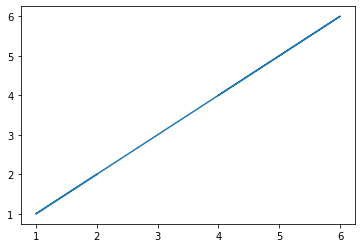

In [33]:
plt.plot(df['label'],df['label'])
plt.show()

In [35]:
ddd=pd.read_csv("custom_data.csv")
ddd


,Unnamed: 0,Name,Review Title,Rating,Size NameReviewed Day,Reviewed Month,Reviewed Year,Verified Purchase,Helpfull No,Review
0,1,SVM,Worst Phone Dont Buy,1.0,27,5,2021,1,603,Worst Phone I have seen specs amd buyed it but...
1,2,Amazon Customer,Very good,4.0,25,5,2021,1,505,Good
2,3,Krishnendu Halder,I request that please work on camera and avail...,3.0,25,5,2021,1,510,All is well but photo quality is very bad. Not...
3,4,vishal,Redmi note pe lag gye girlfriend ke saare note,4.0,18,6,2021,1,200,Phone is tooo good.Battery life is for 15-20 d...
4,5,Ravi Punia,"Skip, don't buy. Just don't !!!",1.0,1,6,2021,1,109,Don't buy. First ever Redmi product and it's d...
...,...,...,...,...,...,...,...,...,...,...
85,86,pratik kumar,worst product and worst customer service.,1.0,28,5,2021,1,109,"I ordered this phone, Redmi note 10s has netwo..."
86,87,Rafi,Poor camera quality and Display quality,1.0,25,5,2021,1,92,Camera quality is very Poor and Display it was...
87,88,Kapil pateriya,"Reasonable deal at this price, Go for it🔥🔥",5.0,30,5,2021,1,78,Your browser does not support HTML5 video.\n\n...
88,89,Mangali Narasimhulu,Worst phone,1.0,25,5,2021,1,80,This is the worst phone from Amazon and redmi...


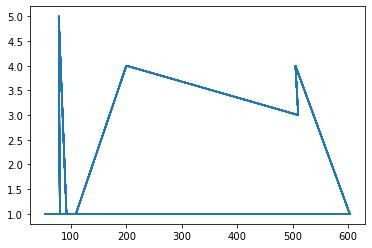

In [49]:
plt.plot(ddd['Helpfull No'],ddd['Rating'])
plt.show()